# PACE Toolkit project group

**Regrid notebook by:** Thiago Nobrega (USP)


## Summary


## Learning Objectives

At the end of this notebook you will :

* Know how to regrid Level 3 data from differents satellites images to match the grid from OCI data
* Visualize exemples of regridded data from the instruments ABI, VIIRS, MODIS and OCLI

Setup and access the data:

We begin by importing the packages used in this notebook.

In [3]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from scipy.interpolate import griddata
import pandas as pd  # Import pandas

In [4]:
tspan = ("2024-07-01", "2024-07-03")

In [5]:
results_PACE = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL_NRT",
    temporal=tspan,
)

In [6]:
results_GOES = earthaccess.search_data(
    short_name="ABI_G16-STAR-L3C-v2.70",
    temporal=tspan,
)

In [7]:
results_VIIRS = earthaccess.search_data(
    short_name="VIIRSJ1_L3m_CHL_NRT",
    temporal=tspan,
)

In [8]:
results_MODIS = earthaccess.search_data(
    short_name="MODISA_L3m_CHL_NRT",
    temporal=tspan,
)

In [9]:
results_OLCI = earthaccess.search_data(
    short_name="OLCIS3B_L3m_ERR_CHL_NRT",
    temporal=tspan,
)

In [10]:
paths_PACE = earthaccess.open(results_PACE)
paths_GOES = earthaccess.open(results_GOES)

QUEUEING TASKS | :   0%|          | 0/17 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/17 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/17 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/72 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/72 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/72 [00:00<?, ?it/s]

The MODIS, VIIRS and OLCI data it is not avaliable in the cloud so we can use the following codes to access example datas for the purpose of the notebook

In [11]:
dataset_MODIS = xr.open_dataset(results_MODIS[0]['umm']['RelatedUrls'][1]['URL'])
dataset_VIIRS = xr.open_dataset(results_VIIRS[0]['umm']['RelatedUrls'][1]['URL'])
dataset_OLCI = xr.open_dataset(results_OLCI[0]['umm']['RelatedUrls'][1]['URL'])

In [12]:
dataset_PACE = xr.open_dataset(paths_PACE[0])
dataset_GOES = xr.open_dataset(paths_GOES[0])

In [13]:
dataset_MODIS

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    palette  (rgb, eightbitcolor) int8 768B ...
    chlor_a  (lat, lon) float32 149MB ...
Attributes: (12/64)
    product_name:                      AQUA_MODIS.20240625_20240702.L3m.8D.CH...
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    source:                            satellite observations from MODIS-Aqua
    ...                                ...
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2022
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         Attribute elided: Unsupported attribut...
    data_minimum:                      0.0026693346
    data_maximum:                      86.32042

In [14]:
dataset_VIIRS

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    palette  (rgb, eightbitcolor) int8 768B ...
    chlor_a  (lat, lon) float32 149MB ...
Attributes: (12/64)
    product_name:                      JPSS1_VIIRS.20240601_20240702.L3m.R32....
    instrument:                        VIIRS
    title:                             VIIRSJ1 Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          JPSS-1
    source:                            satellite observations from VIIRS-JPSS-1
    ...                                ...
    identifier_product_doi:            10.5067/NOAA-20/VIIRS/L3M/CHL/2022
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         Attribute elided: Unsupported attribut...
    data_minimum:                      0.0027384274
    data_maximum:                      67.96177

In [15]:
dataset_OLCI

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    palette  (rgb, eightbitcolor) int8 768B ...
    chlor_a  (lat, lon) float32 149MB ...
Attributes: (12/64)
    product_name:                      S3B_OLCI_ERRNT.20240701.L3m.DAY.CHL.ch...
    instrument:                        OLCI
    title:                             OLCIS3B Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Sentinel-3B
    source:                            satellite observations from OLCI-Senti...
    ...                                ...
    identifier_product_doi:            10.5067/SENTINEL-3B/OLCI/L3M/ERR/CHL/2022
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         Attribute elided: Unsupported attribut...
    data_minimum:                      0.0036685446
    data_maximum:                      99.768

In [16]:
dataset_GOES

<xarray.Dataset> Size: 7GB
Dimensions:                  (lon: 18000, lat: 9000, time: 1)
Coordinates:
  * lon                      (lon) float32 72kB -180.0 -180.0 ... 180.0 180.0
  * lat                      (lat) float32 36kB 89.99 89.97 ... -89.97 -89.99
  * time                     (time) datetime64[ns] 8B 2024-07-01
Data variables:
    quality_level            (time, lat, lon) float32 648MB ...
    l2p_flags                (time, lat, lon) int16 324MB ...
    or_number_of_pixels      (time, lat, lon) float64 1GB ...
    sea_surface_temperature  (time, lat, lon) float32 648MB ...
    dt_analysis              (time, lat, lon) float32 648MB ...
    satellite_zenith_angle   (time, lat, lon) float32 648MB ...
    sses_bias                (time, lat, lon) float32 648MB ...
    sses_standard_deviation  (time, lat, lon) float32 648MB ...
    wind_speed               (time, lat, lon) float32 648MB ...
    sst_dtime                (time, lat, lon) timedelta64[ns] 1GB ...
    crs                      int32 4B ...
Attributes: (12/53)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    SSTs are a weighted average of the SSTs of co...
    creator_email:              Alex.Ignatov@noaa.gov
    ...                         ...
    sst_luts:                   LUT_ABI_G16_L2C_DEPTH_DAYNIGHT_V01.06_2019042...
    Sub_Lon:                    -75.0
    row_start:                  1540
    row_count:                  5920
    col_start:                  2290
    col_count:                  5920

The ABI-GOES data and many others are configured with three coordinates, time, lat and lon, to be able to regrid the whole dataset it's necessary to filter all the data that has datetime as type and the data that has no coordinates too, the following function filter the dataset for the regrid

In [17]:
def filter_dataset_v3(ds):

    #Find the coordinates that are datetime type
    datetime_coords = [coord for coord in ds.coords if xr.core.common.is_np_datetime_like(ds[coord].dtype)]
    # Filter out coordinates that are of datetime type
    filtered_coords = ds.isel(time=0).drop_vars(str(datetime_coords[0]))
    # Filter out variables that are empty or of datetime type or has no coordinates associated with it
    filtered_vars = {
        var: ds[var]
        for var in ds.data_vars
        if ds[var].size > 0 
        and not xr.core.common.is_np_datetime_like(ds[var].dtype)
        and set(ds[var].dims).intersection(ds.coords)
    }
    
    # Create a new dataset with the filtered variables
    filtered_ds = xr.Dataset(filtered_vars)
    return filtered_ds

The function bellow regrid a dataset based on the grid of a reference dataset, there is a flag if the target dataset is already finer than the reference dataset.
The regrid is made coarsening the dataset with finer resolution to match the resolution of the target dataset, this example is set with averaging the pixels within the block, but is possible to do the same by taking the max value, the minimum, the sum, etc. 
The example uses the trim method over the boundaries, so it discards the extra data that can't form a full block, but it is possible to uses other methods like pad(pads the data to complete blocks), exact(ensures all blocks are complete, raises an error if not) and expand(expands the last block with NaNs to include all data).

In [18]:
def regrid_to_match_v8(reference_ds, target_ds):
    """
    Regrid the target xarray dataset to match the dimensions of the reference xarray dataset using coarsening.

    Parameters:
    reference_ds (xarray.Dataset): The reference dataset with the desired dimensions.
    target_ds (xarray.Dataset): The dataset to be regridded.

    Returns:
    xarray.Dataset: The regridded dataset.
    """
    
    # Identify the dimension names for lat and lon in both datasets
    def get_lat_lon_names(ds):
        for dim in ds.dims:
            if 'lat' in dim.lower():
                lat_dim = dim
            elif 'lon' in dim.lower():
                lon_dim = dim
        return lat_dim, lon_dim
    
    ref_lat_dim, ref_lon_dim = get_lat_lon_names(reference_ds)
    tgt_lat_dim, tgt_lon_dim = get_lat_lon_names(target_ds)
    
    # Get the shapes of the reference and target datasets
    ref_lat_len = reference_ds.sizes[ref_lat_dim]
    ref_lon_len = reference_ds.sizes[ref_lon_dim]
    tgt_lat_len = target_ds.sizes[tgt_lat_dim]
    tgt_lon_len = target_ds.sizes[tgt_lon_dim]
    
    # Calculate coarsening factors
    factor_lat = tgt_lat_len // ref_lat_len
    factor_lon = tgt_lon_len // ref_lon_len

    # Ensure the factors are greater than 1
    if factor_lat < 1 or factor_lon < 1:
        raise ValueError("The target dataset is already finer than the reference dataset.")

    # Coarsen the target dataset
    coarsened_ds = target_ds.coarsen({tgt_lat_dim: factor_lat, tgt_lon_dim: factor_lon}, boundary='trim').mean()

    # Interpolate to match exactly the reference dataset dimensions if necessary
    if coarsened_ds.sizes[tgt_lat_dim] != ref_lat_len or coarsened_ds.sizes[tgt_lon_dim] != ref_lon_len:
        coarsened_ds = coarsened_ds.interp(**{ref_lat_dim: reference_ds[ref_lat_dim], ref_lon_dim: reference_ds[ref_lon_dim]})

    return coarsened_ds

Here are some examples of how to use the filter and the regrid functions 

In [19]:
dataset_goes_filtered = filter_dataset_v3(dataset_GOES)
new_goes_grid = regrid_to_match_v8(dataset_PACE,dataset_goes_filtered)

In [20]:
new_viirs_grid = regrid_to_match_v8(dataset_PACE,dataset_VIIRS)
new_modis_grid = regrid_to_match_v8(dataset_PACE,dataset_MODIS)
new_olci_grid = regrid_to_match_v8(dataset_PACE,dataset_OLCI)

Now we see some examples, first the plots of chlorophyll concentrations and sea surface temperature before the regrid for all the examples datas

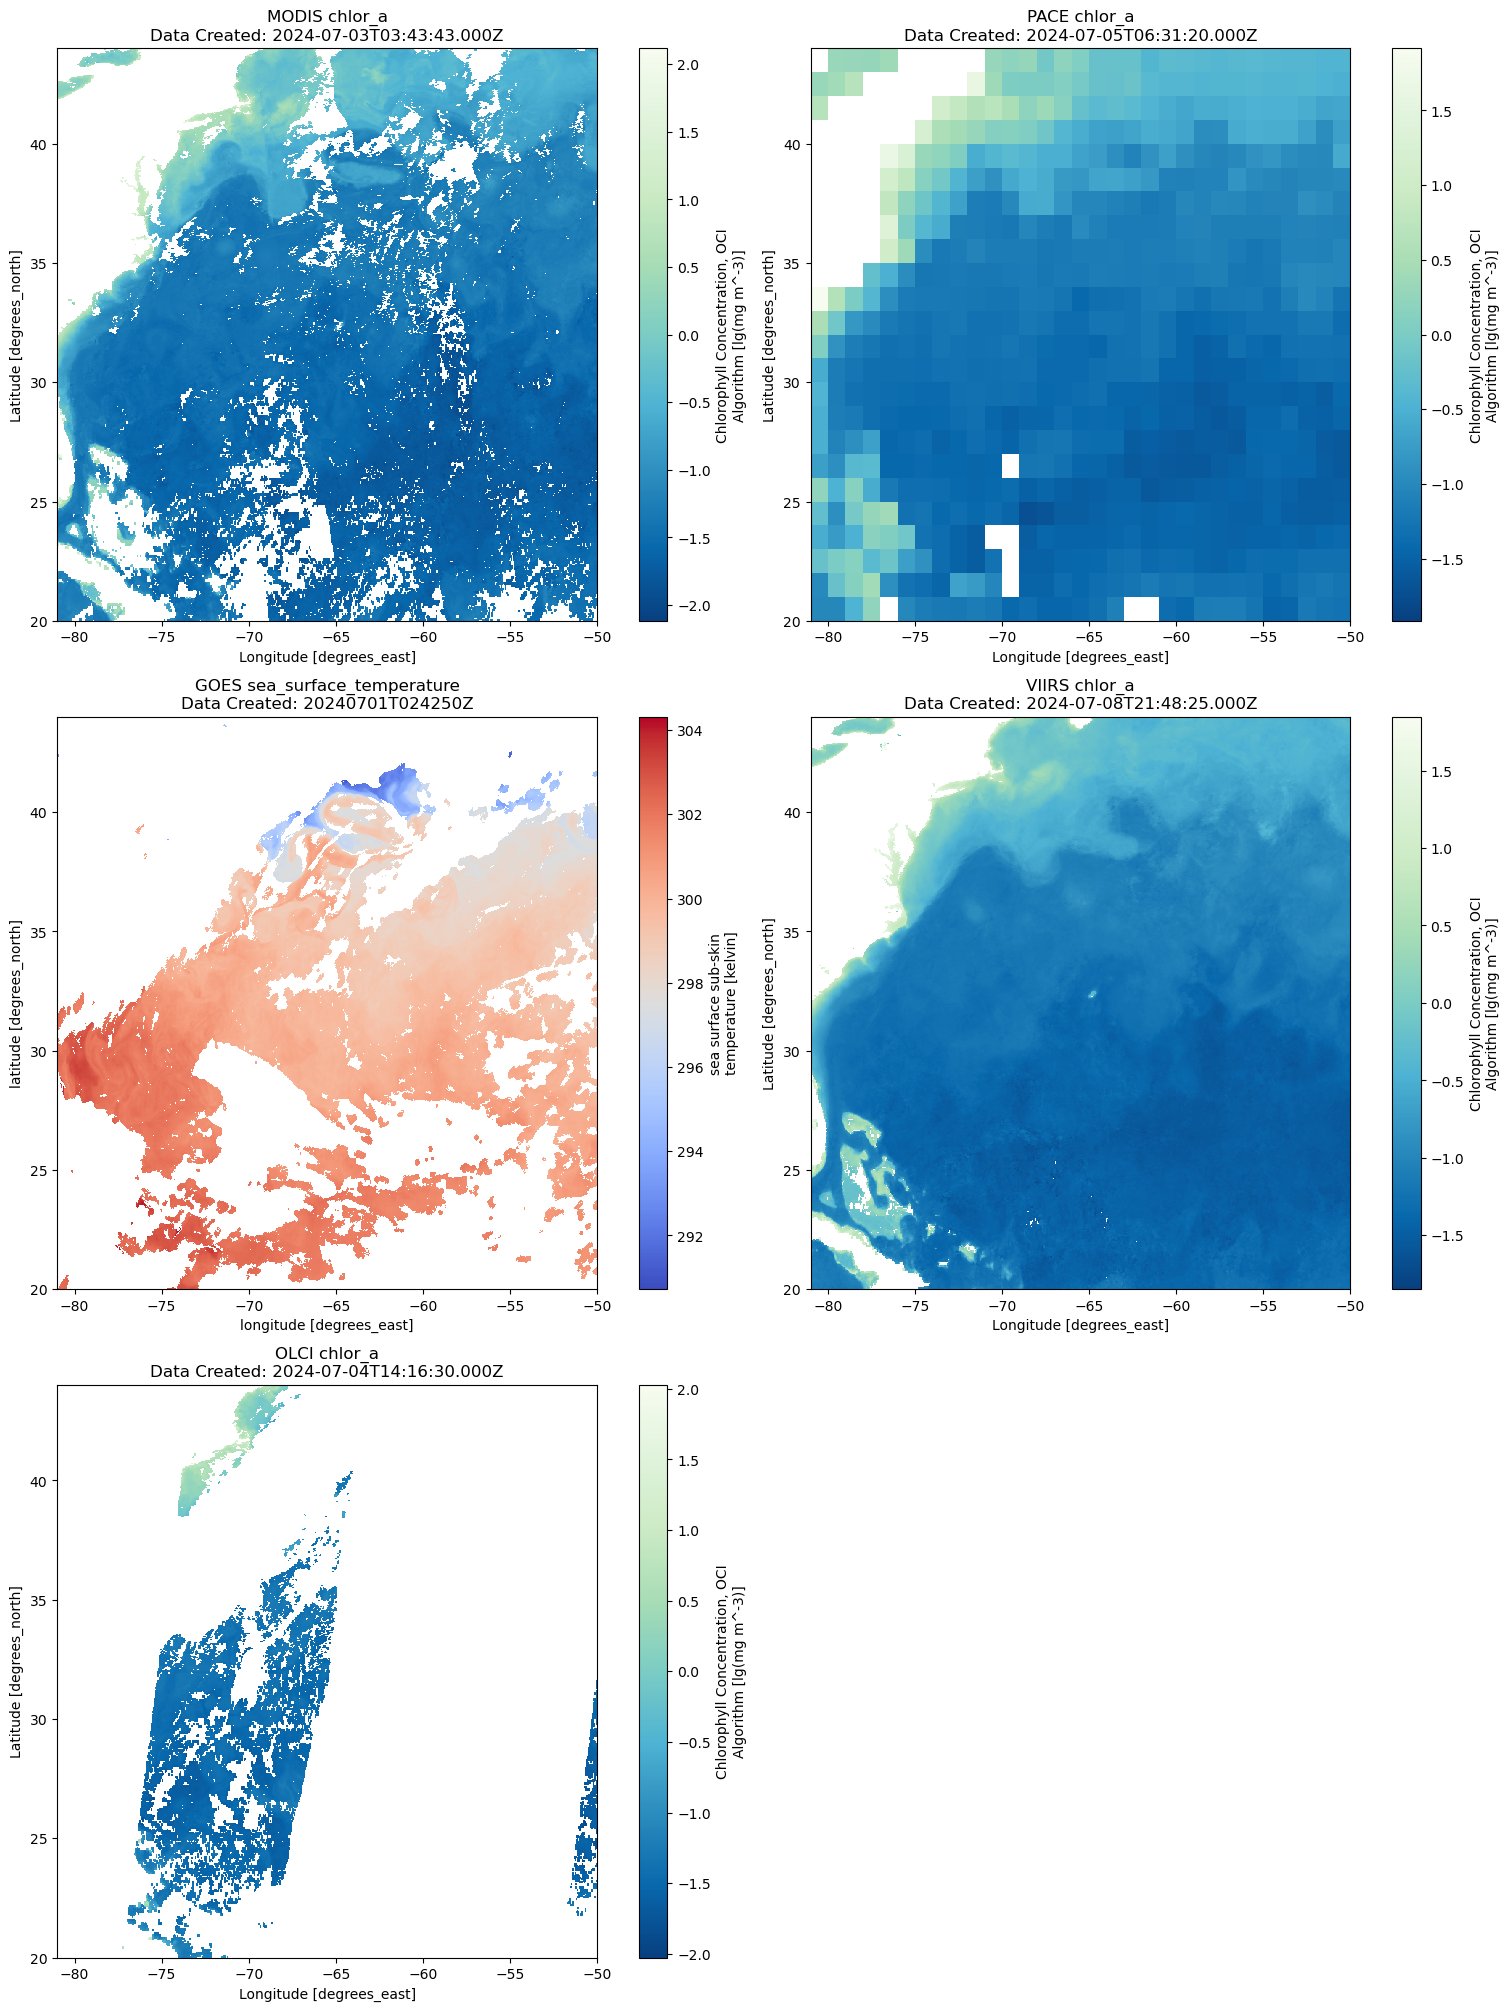

In [21]:
datasets = {
    "MODIS": dataset_MODIS,
    "PACE": dataset_PACE,
    "GOES": dataset_GOES,
    "VIIRS": dataset_VIIRS,
    "OLCI": dataset_OLCI
}

# Define the region for slicing
lat_slice = slice(44, 20)
lon_slice = slice(-81, -50)

# Create a subplot scheme
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20), constrained_layout=True)
axes = axes.flatten()

# Iterate over datasets and plot
for i, (name, dataset) in enumerate(datasets.items()):
    if i >= len(axes):  # If there are more datasets than subplot cells, break
        break

    if name == "GOES":
        # Select the sea_surface_temperature variable and the defined region
        sst_box = dataset["sea_surface_temperature"].sel(lat=lat_slice, lon=lon_slice)

        # Get the 'data_created' attribute from the dataset
        data_created = dataset.attrs.get("date_created", "Unknown date")
        
        # Plot on the corresponding subplot axis with a different colormap
        sst_box.plot(ax=axes[i], cmap="coolwarm")
        axes[i].set_title(f"{name} sea_surface_temperature\nData Created: {data_created}")
    else:
        # Select the chlor_a variable and the defined region
        chlor_a_box = dataset["chlor_a"].sel(lat=lat_slice, lon=lon_slice)
        
        # Apply log10 transformation
        chla = np.log10(chlor_a_box)
        
        # Update the attributes
        units = dataset["chlor_a"].attrs.get("units", "unknown")
        chla.attrs.update({"units": f'lg({units})'})

        # Get the 'data_created' attribute from the dataset
        data_created = dataset.attrs.get("date_created", "Unknown date")

        # Plot on the corresponding subplot axis
        chla.plot(ax=axes[i], cmap="GnBu_r")
        #axes[i].set_title(f"{name} chlor_a")
        # Set the title to include the 'data_created' attribute
        axes[i].set_title(f"{name} chlor_a\nData Created: {data_created}")
# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

And then the same images after the regrid

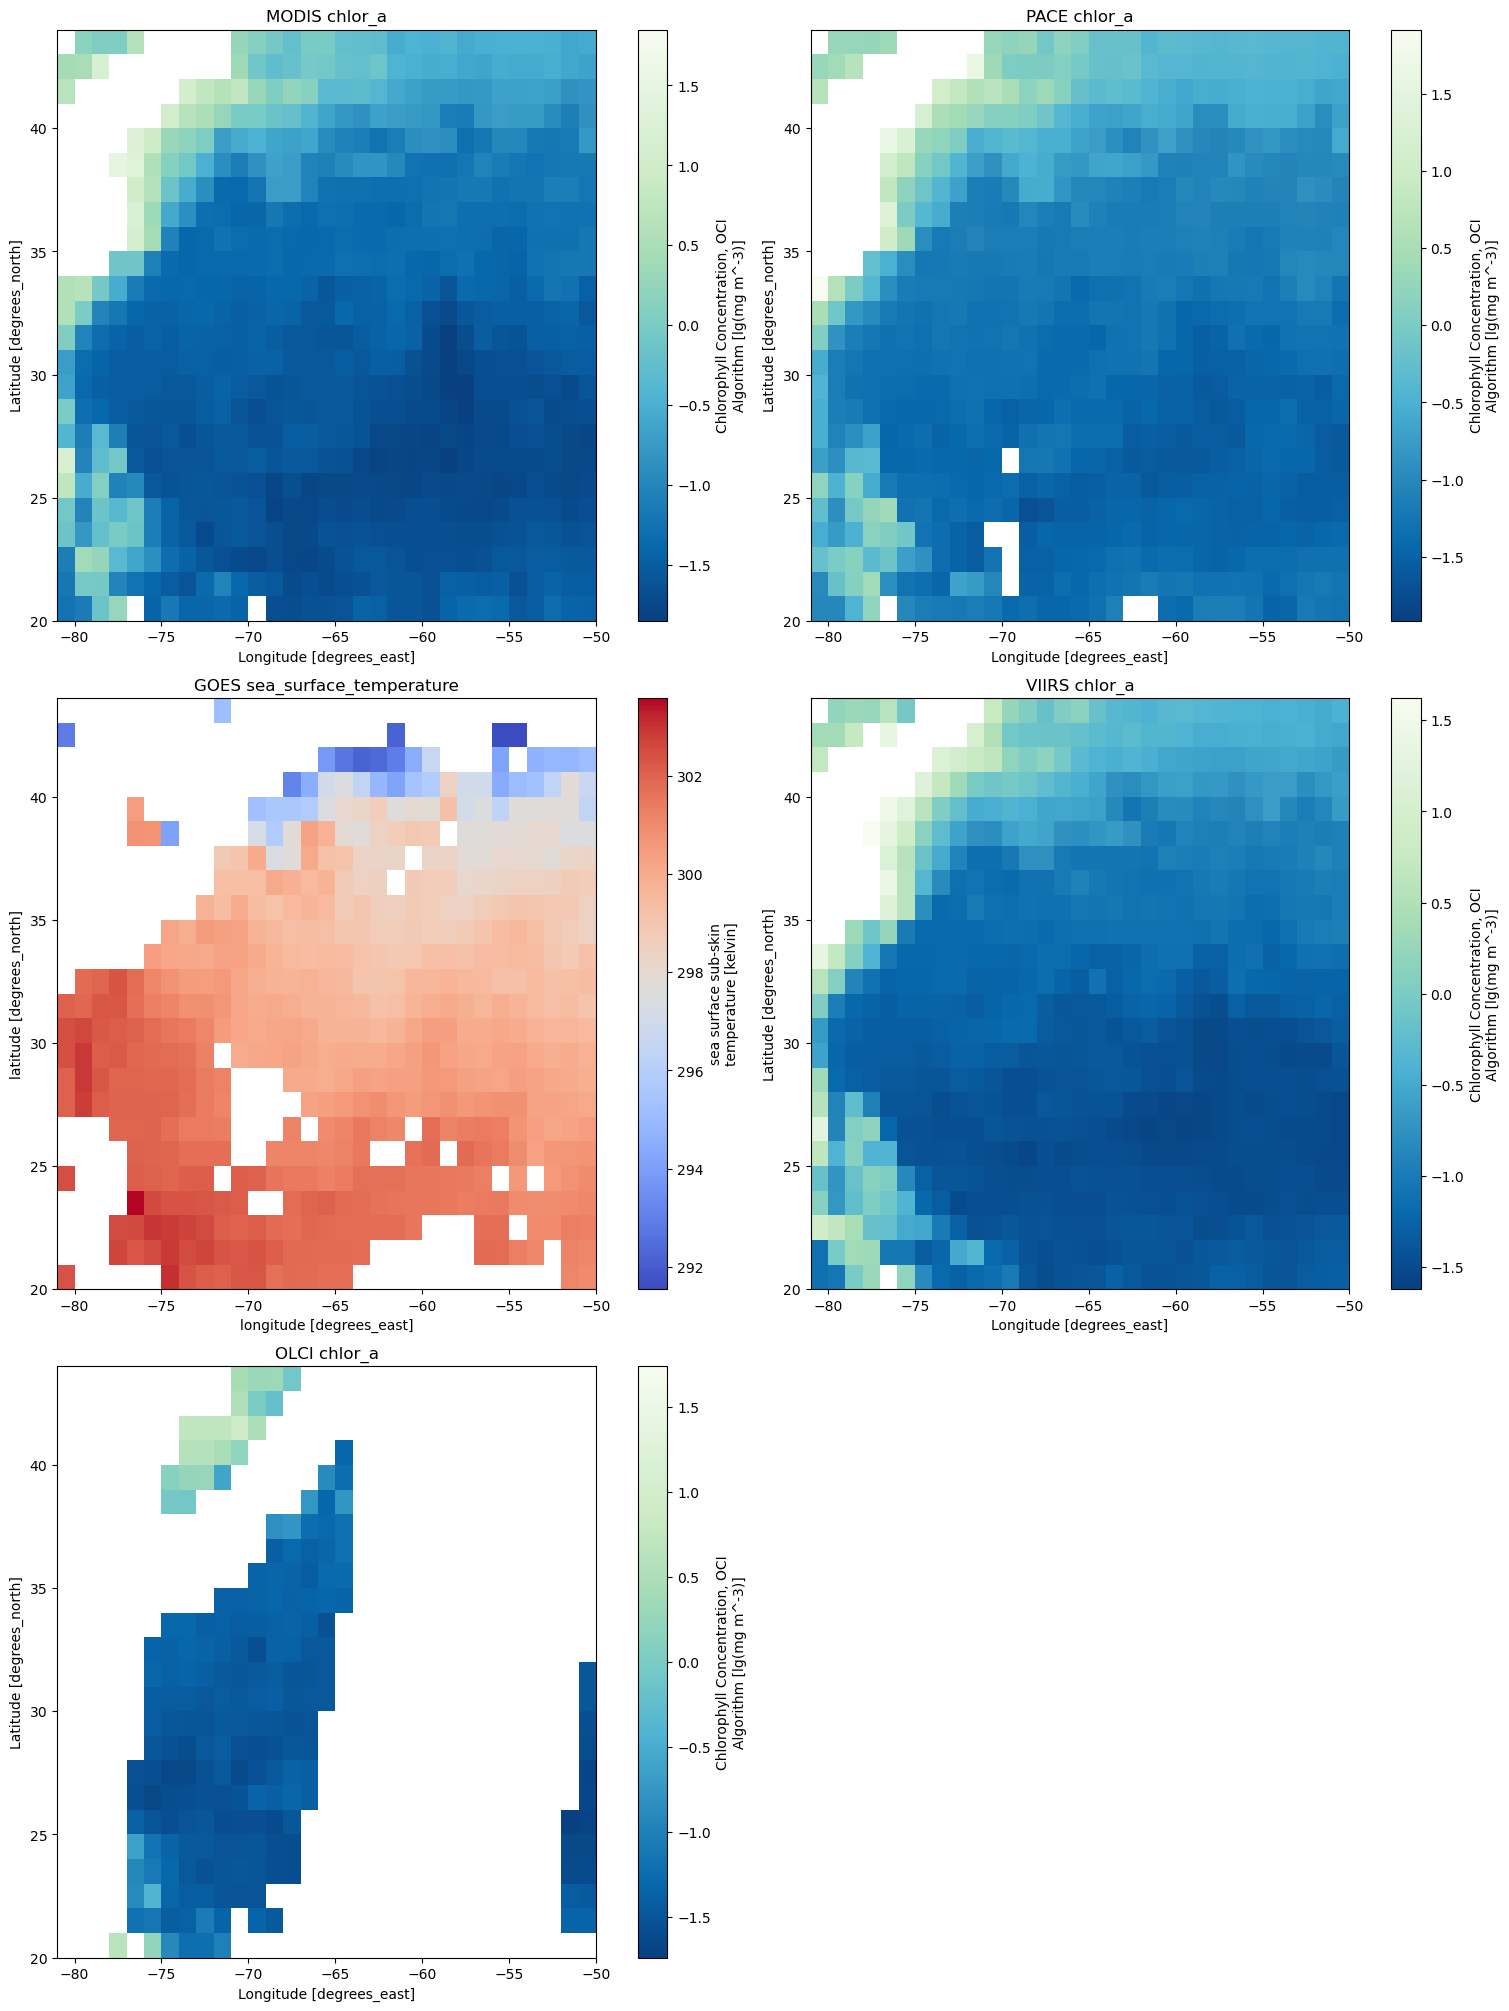

In [22]:
datasets_2 = {
    "MODIS": new_modis_grid,
    "PACE": dataset_PACE,
    "GOES": new_goes_grid,
    "VIIRS": new_viirs_grid,
    "OLCI": new_olci_grid
}

# Define the region for slicing
lat_slice = slice(44, 20)
lon_slice = slice(-81, -50)

# Create a subplot scheme
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20), constrained_layout=True)
axes = axes.flatten()

# Iterate over datasets and plot
for i, (name, datasets_2) in enumerate(datasets_2.items()):
    if i >= len(axes):  # If there are more datasets than subplot cells, break
        break

    if name == "GOES":
        # Select the sea_surface_temperature variable and the defined region
        sst_box = datasets_2["sea_surface_temperature"].sel(lat=lat_slice, lon=lon_slice)
        
        # Plot on the corresponding subplot axis with a different colormap
        sst_box.plot(ax=axes[i], cmap="coolwarm")
        axes[i].set_title(f"{name} sea_surface_temperature")
    else:
        # Select the chlor_a variable and the defined region
        chlor_a_box = datasets_2["chlor_a"].sel(lat=lat_slice, lon=lon_slice)
        
        # Apply log10 transformation
        chla = np.log10(chlor_a_box)
        
        # Update the attributes
        units = datasets_2["chlor_a"].attrs.get("units", "unknown")
        chla.attrs.update({"units": f'lg({units})'})

        # Plot on the corresponding subplot axis
        chla.plot(ax=axes[i], cmap="GnBu_r")
        axes[i].set_title(f"{name} chlor_a")

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Now we can compare the measurements of chlorophyll concentrations of VIIRS, MODIS and OCLI with the measurement made by the PACE OCI instrument

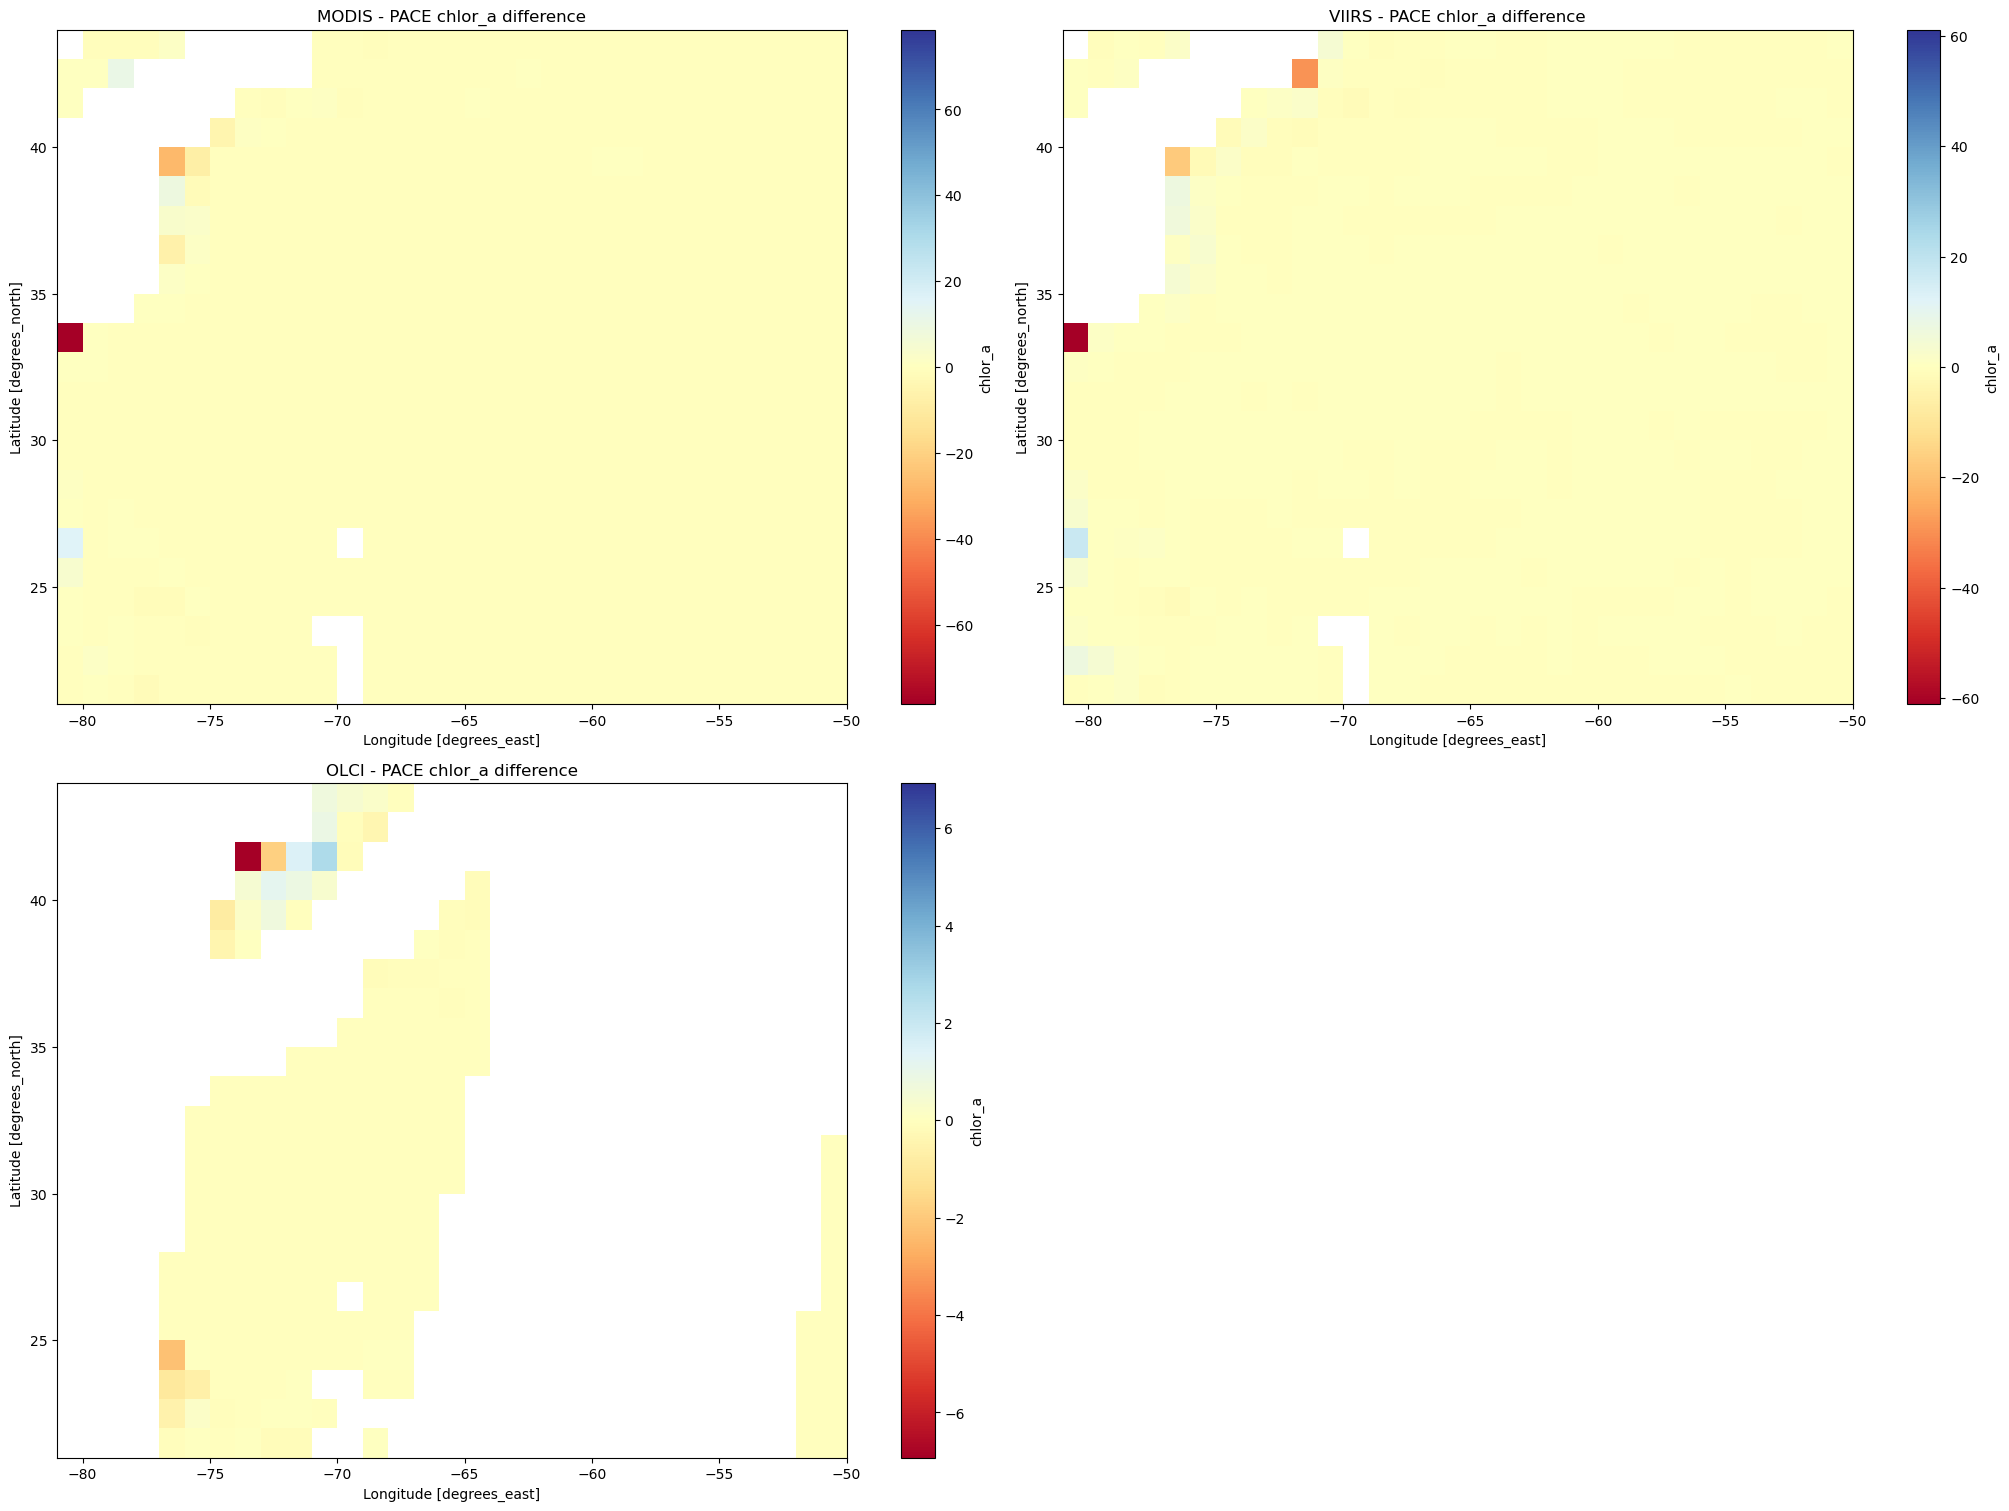

In [23]:
# Define the region for slicing
lat_slice = slice(44, 20)
lon_slice = slice(-81, -50)
# Select the chlor_a variable and the defined region for all datasets
datasets = {
    "MODIS": new_modis_grid["chlor_a"].sel(lat=lat_slice, lon=lon_slice),
    "PACE": dataset_PACE["chlor_a"].sel(lat=lat_slice, lon=lon_slice),
    "VIIRS": new_viirs_grid["chlor_a"].sel(lat=lat_slice, lon=lon_slice),
    "OLCI": new_olci_grid["chlor_a"].sel(lat=lat_slice, lon=lon_slice)
}

# Ensure all datasets are on the same grid (regrid if necessary)
# For simplicity, assuming they are already on the same grid

# Compute the difference with respect to PACE
differences = {name: datasets[name] - datasets["PACE"] for name in datasets if name != "PACE"}

# Create a subplot scheme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Plot the differences
for i, (name, diff) in enumerate(differences.items()):
    diff.plot(ax=axes[i], cmap="RdYlBu", center=0)
    axes[i].set_title(f"{name} - PACE chlor_a difference")

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()